<a href="https://colab.research.google.com/github/juan46buitrago/ia_2025/blob/main/clase6_arboles_de_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AGENDA
1. objetivo de estudio
2. Exploracion de datos EDA
3.Limpieza de datos
4. entrenar el modelo (arbol de decicion)
5. evaluar metod

In [32]:
#tratamiento de datos
import pandas as pd
import numpy as np

#visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
#modelo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
datos=pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Advertising_Web.csv")
datos.head()

,Unnamed: 0,X,TV,Radio,Newspaper,Web,Sales
0,1,1,230.1,37.8,69.2,306.634752,22.1
1,2,2,44.5,39.3,45.1,302.653070,10.4
2,3,3,17.2,45.9,69.3,49.498908,9.3
3,4,4,151.5,41.3,58.5,257.816893,18.5
4,5,5,180.8,10.8,58.4,195.660076,12.9


#objetivo
crear y evaluar un modelo de arbol de decision para predecir lasventas con datos simulados de una empres, dependiente de la inversion relaizadas em publicidad

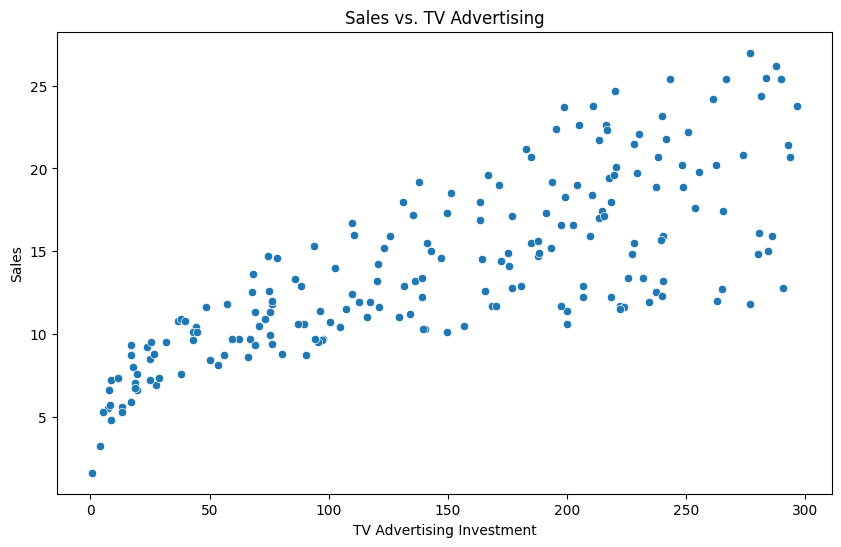

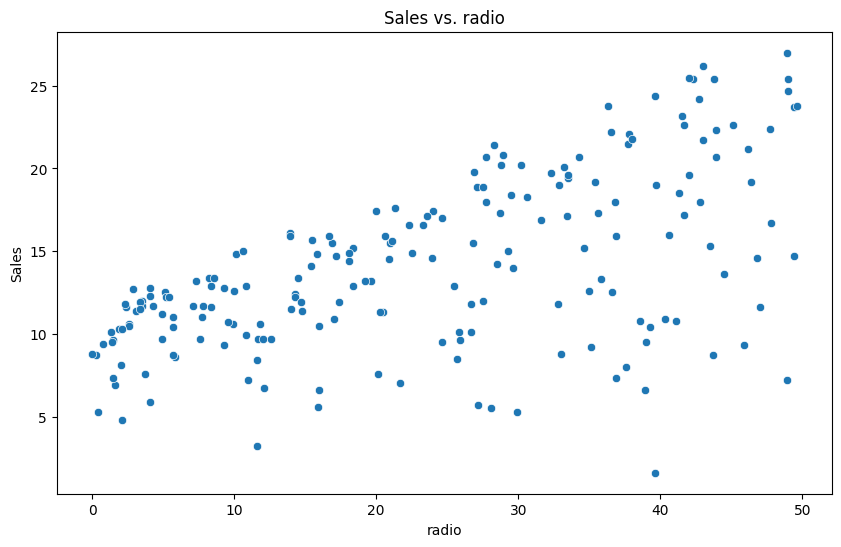

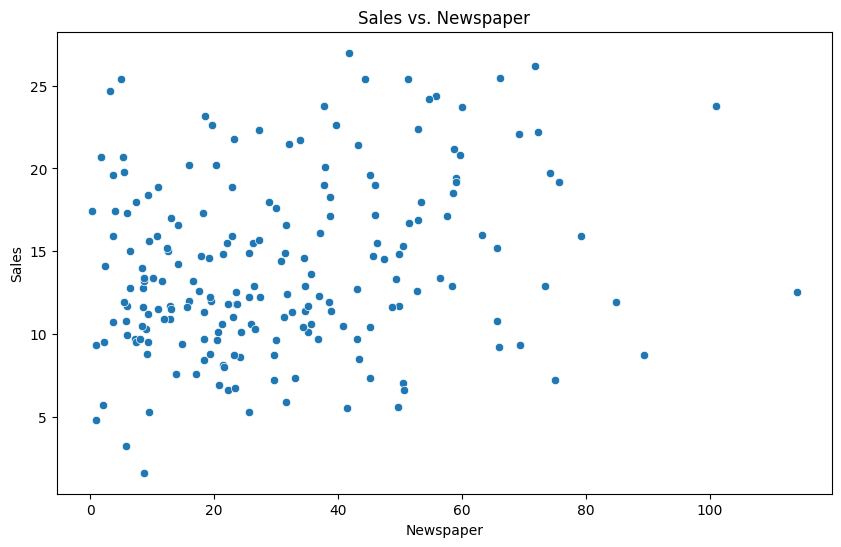

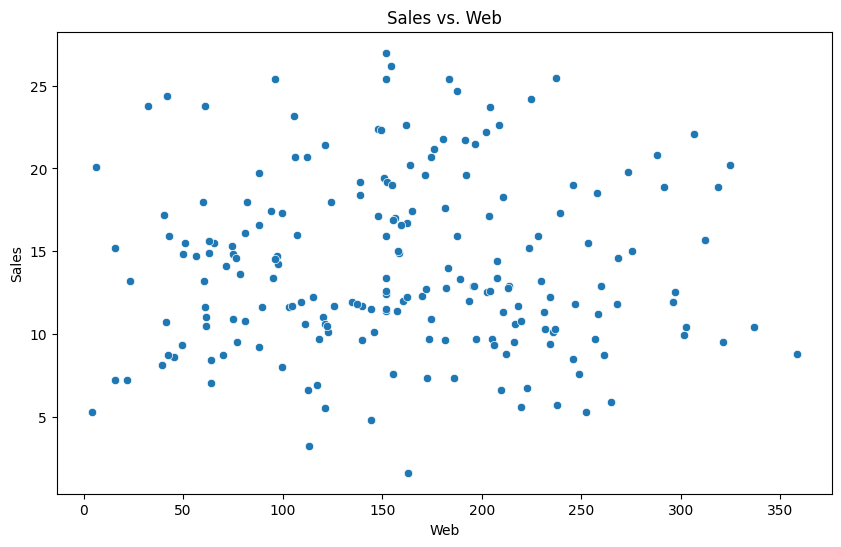

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=datos)
plt.title('Sales vs. TV Advertising')
plt.xlabel('TV Advertising Investment')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Radio', y='Sales', data=datos)
plt.title('Sales vs. radio')
plt.xlabel('radio')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Newspaper', y='Sales', data=datos)
plt.title('Sales vs. Newspaper')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Web', y='Sales', data=datos)
plt.title('Sales vs. Web')
plt.xlabel('Web')
plt.ylabel('Sales')
plt.show()

##2 explracion de datos EDA

In [16]:
print("obsevaciones y variables:",datos.shape)

obsevaciones y variables: (200, 7)


In [17]:
datos.dtypes

,0
Unnamed: 0,int64
X,int64
TV,float64
Radio,float64
Newspaper,float64
Web,float64
Sales,float64


In [18]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   X           200 non-null    int64  
 2   TV          200 non-null    float64
 3   Radio       200 non-null    float64
 4   Newspaper   200 non-null    float64
 5   Web         200 non-null    float64
 6   Sales       200 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 11.1 KB


se describen como variables independientesTV, radio, newspaper y web como variable dependiente

las variables independientes son:


*   TV: costos depublicidad en tv(miles dolares)
*   Radio.costos de publicidad inverido en radio(miles dolares)
*   newpapaer: costos depublicidad en newspaper(miles dolares)
*   web:costos de publicidad inverido en web(miles dolares)



#limpiza de datos

In [21]:
datos=datos[["TV","Radio","Newspaper","Web","Sales"]]
datos.describe()

,TV,Radio,Newspaper,Web,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,159.587355,14.022500
std,85.854236,14.846809,21.778621,76.815266,5.217457
min,0.700000,0.000000,0.300000,4.308085,1.600000
25%,74.375000,9.975000,12.750000,99.048767,10.375000
50%,149.750000,22.900000,25.750000,156.862154,12.900000
75%,218.825000,36.525000,45.100000,212.311848,17.400000
max,296.400000,49.600000,114.000000,358.247042,27.000000


#Datos de entrenamiento y datos de validacion(entrenamiento modelo)

se emplea la semilla 1279 (random_state=2022)lods datos se dstribuyem de la siguiente manera:


*   70% para entrenamiento
*   30% para validacion del modelo



In [28]:
x_entrena,X_valida,Y_entrena,y_valida=train_test_split(datos.drop(columns="Sales"),datos["Sales"],train_size=.7,random_state=1279)

In [30]:
x_entrena.shape

(140, 4)

## 4.1 Modelo El arbol de decision

La clase DecisionTreeregressor del modulo sklearn:ress tinne el siguiente parametros
* max_depth:profundidad maxima que puede alcanzar el arbol
* cax_sample_split:numero minimo de observaciones que debe detneer el nodo para uqe pueda dividirse de entrenamiento.cell
* min_samples_lead:numero minimo de observaciiones que debe tner cada un de los nodos hijos porque se produzca divisiones
* max_leaf

In [33]:
modelos_ar=DecisionTreeRegressor(max_depth=3,random_state=2022)

usamos los datos de entrenamiento (X_ENTRENA, y_ENTRENA) con el modelo del arbl regresion

In [35]:
modelos_ar.fit(x_entrena,Y_entrena)

DecisionTreeRegressor(max_depth=3, random_state=2022)

In [ ]:
## 4.2 vISUALIZACION DEL Modelo

In [36]:
print(f"profundidad del arbol: {modelos_ar.get_depth()}")
print(f"numero de nodos terminales: {modelos_ar.get_n_leaves()}")

profundidad del arbol: 3
numero de nodos terminales: 8


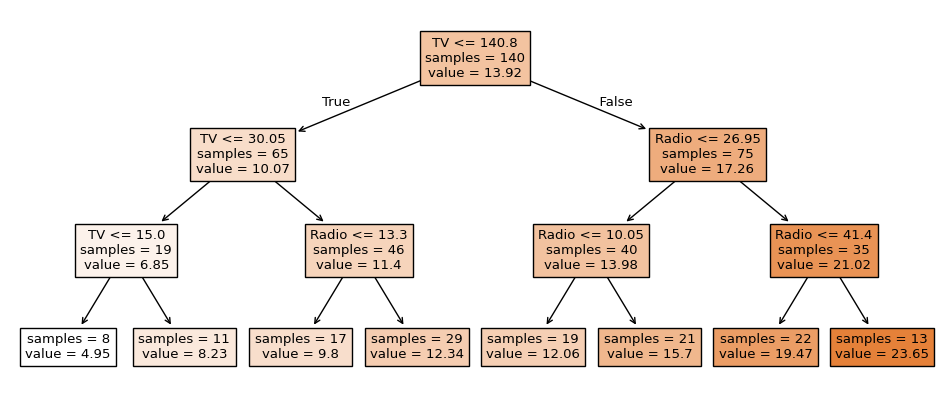

In [37]:
fig,ax=plt.subplots(figsize=(12,5))
plot=plot_tree(
    decision_tree=modelos_ar,
    feature_names=datos.drop(columns="Sales").columns,

    filled=True,
    impurity=False,

    precision=2,
 ax=ax
    )


In [38]:
texto_modelo=export_text(
    decision_tree=modelos_ar,
    feature_names=datos.drop(columns="Sales").columns
)
print(texto_modelo)

|--- TV <= 140.80
|   |--- TV <= 30.05
|   |   |--- TV <= 15.00
|   |   |   |--- value: [4.95]
|   |   |--- TV >  15.00
|   |   |   |--- value: [8.23]
|   |--- TV >  30.05
|   |   |--- Radio <= 13.30
|   |   |   |--- value: [9.80]
|   |   |--- Radio >  13.30
|   |   |   |--- value: [12.34]
|--- TV >  140.80
|   |--- Radio <= 26.95
|   |   |--- Radio <= 10.05
|   |   |   |--- value: [12.06]
|   |   |--- Radio >  10.05
|   |   |   |--- value: [15.70]
|   |--- Radio >  26.95
|   |   |--- Radio <= 41.40
|   |   |   |--- value: [19.47]
|   |   |--- Radio >  41.40
|   |   |   |--- value: [23.65]



## 4.3 predicciones
La importancia de cada predictor en el modelo se calcula como la reducuccion total (normalizada) en el criterio dedivision: en este caso el mas que cosique el predictos divisiones en la que participe: si un predictos no se ha selecciona en ninguna dividion

In [41]:
importacia_predictor=pd.DataFrame(
    {
        "predictor":datos.drop(columns="Sales").columns,
        "importancia":modelos_ar.feature_importances_}
)

In [42]:
importacia_predictor.sort_values(by="importancia", ascending=False)

,predictor,importancia
0,TV,0.626264
1,Radio,0.373736
2,Newspaper,0.000000
3,Web,0.000000
